## Demo notebook, pyeyesim library

this notebook is for testing and developing the PyEyeSim library for eye-movement comparison for looking at static images 

test with dependencies:
- xarray: 0.19.0
- pandas: 1.3.2
- numpy: 1.20.3
- matplotlib: 3.4.2
- scipy: 1.7.1 


### Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from scipy import stats


### import PyEyeSim library

In [2]:
from PyEyeSim import pyeyesim_func as pysim


for development: changes should load automatically

In [3]:
%load_ext autoreload
%autoreload 2

##  Set file path and load data file 

In [59]:

Filepath='/Users/jarato/Documents/EyeTracking/MemoryStudyFix.csv'

Filepath='/Volumes/GoogleDrive/My Drive/Vienna/CreaLab/GenderProject/GenderIIFemalePaint.csv'

sizeX=2560
sizeY=1600

In [5]:
fixData=pd.read_csv(Filepath)
fixData

,Unnamed: 0,Unnamed: 0.1,subjectID,Number,GazePoints,mean_x,mean_y,radius,Cluster,Painting,PartGend,Gaze Points,Radius
0,0,0,G_001,1.0,30.0,1231.0,860.0,19.9396,0.0,Bellini_Halbakt,Male,NaN,NaN
1,1,1,G_001,2.0,13.0,1242.0,412.0,25.8158,0.0,Bellini_Halbakt,Male,NaN,NaN
2,2,2,G_001,3.0,20.0,1255.0,419.0,37.4225,0.0,Bellini_Halbakt,Male,NaN,NaN
3,3,3,G_001,4.0,31.0,1270.0,440.0,25.6350,0.0,Bellini_Halbakt,Male,NaN,NaN
4,4,4,G_001,5.0,48.0,1045.0,751.0,37.7525,0.0,Bellini_Halbakt,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51610,28411,3714,P74_VF,74.0,36.0,823.0,656.0,23.1638,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51611,28412,3715,P74_VF,75.0,22.0,850.0,658.0,20.8895,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51612,28413,3716,P74_VF,76.0,14.0,828.0,668.0,27.6424,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN
51613,28414,3717,P74_VF,77.0,17.0,825.0,659.0,28.2337,0.0,Wittmann_Selbstbildnis,Female,NaN,NaN


## Descriptive function

returns:

- number of fixations (stimulus and participant)  (xarray format)

- stimulus names  (numpy array)

- subject codes  (numpy array)

- Mean X,Y location of fixations (xarray format)

- Mean SD X,Y of fixations  (xarray format)

- inferred stimulus boundaries (99% fixation locations - pandas format)

Data for  56 observers and  12  stimuli.
Mean fixation number:  76.81  +/-  11.44
Num of trials with zero fixations: 1
Num valid trials  671
Mean X location:  1302.47  +/-  53.02  pixels
Mean Y location:  771.54  +/-  78.3  pixels


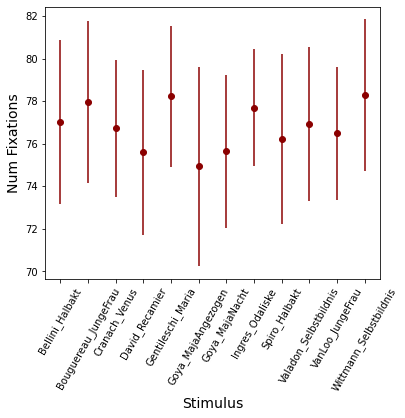

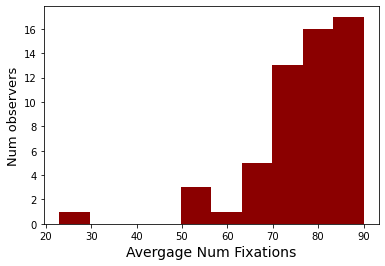

In [27]:
NFix,Stimuli,Subjects,MeanFixXY,SDFixXY,Bounds=pysim.RunDescriptiveFix(fixData,StimName='Painting',SubjName='subjectID',Visual=1)

In [26]:
Bounds

,Stimulus,BoundX1,BoundX2,BoundY1,BoundY2
0,Bellini_Halbakt,415.560,2150.760,109.560,1639.440
1,Bouguereau_JungeFrau,905.475,1630.000,151.300,1569.350
2,Cranach_Venus,874.475,1762.000,97.000,1662.525
3,David_Recamier,267.160,2184.680,159.640,1510.840
4,Gentileschi_Maria,374.800,2298.100,111.500,1558.700
5,Goya_MajaAngezogen,197.900,2440.000,268.975,1522.050
6,Goya_MajaNacht,166.525,2451.250,316.000,1435.475
7,Ingres_Odaliske,123.500,2578.000,206.000,1540.250
8,Spiro_Halbakt,814.335,1879.000,209.335,1673.665
9,Valadon_Selbstbildnis,245.535,2254.395,103.070,1681.930


In [37]:
NFix

<xarray.DataArray (subjectID: 56, Painting: 12)>
array([[ 81.,  79.,  87.,  75.,  70.,  80.,  79.,  80.,  82.,  73.,  78.,
         80.],
       [ 76.,  71.,  74.,  65.,  84.,  78.,  68.,  78.,  78.,  79.,  66.,
         80.],
       [ 68.,  73.,  71.,  59.,  61.,  69.,  72.,  67.,  70.,  60.,  68.,
         72.],
       [ 95.,  78.,  79.,  95.,  88., 101.,  94.,  84., 100.,  70.,  81.,
         99.],
       [ 73.,  86.,  79.,  77.,  79.,  75.,  88.,  77.,  62.,  73.,  72.,
         87.],
       [ 85.,  90.,  87.,  86.,  86.,  82.,  82.,  85.,  75.,  85.,  87.,
         80.],
       [ 89.,  88.,  89.,  87.,  84.,  90.,  77.,  86.,  87.,  85.,  88.,
         86.],
       [ 90.,  84.,  91.,  88.,  91.,  88.,  86.,  85.,  88.,  87.,  79.,
         92.],
       [ 85.,  96.,  83.,  79.,  88.,  75.,  80.,  90.,  82.,  89.,  79.,
         89.],
       [ 76.,  76.,  81.,  84.,  79.,  85.,  74.,  69.,  80.,  75.,  77.,
         81.],
...
       [ 58.,  85.,  59.,  70.,  47.,  36.,  48.,  62.,  40.,  50.,  49.,
         55.],
       [ 87.,  89.,  81.,  94.,  92.,  84.,  80.,  89.,  92.,  87.,  80.,
         78.],
       [ 55.,  56.,  64.,  59.,  85.,  60.,  71.,  66.,  69.,  73.,  69.,
         68.],
       [ 39.,  55.,  65.,  40.,  68.,   0.,  44.,  64.,  48.,  79.,  51.,
         78.],
       [ 79.,  77.,  75.,  79.,  83.,  84.,  71.,  88.,  81.,  69.,  83.,
         83.],
       [ 58.,  54.,  63.,  57.,  57.,  64.,  50.,  66.,  64.,  28.,  61.,
         50.],
       [ 76.,  69.,  79.,  77.,  79.,  68.,  62.,  84.,  73.,  78.,  70.,
         73.],
       [ 68.,  65.,  68.,  68.,  62.,  77.,  77.,  84.,  60.,  75.,  71.,
         68.],
       [ 63.,  56.,  66.,  56.,  73.,  67.,  71.,  60.,  57.,  65.,  65.,
         67.],
       [ 72.,  71.,  70.,  45.,  62.,  80.,  65.,  62.,  71.,  66.,  66.,
         72.]])
Coordinates:
  * subjectID  (subjectID) object 'G_001' 'G_002' 'G_003' ... 'P85_VF' 'P87_VF'
  * Painting   (Painting) object 'Bellini_Halbakt' ... 'Wittmann_Selbstbildnis'

the advantage of xarray is named coordinates, that can also be indexed as a numpy array:


NFix.sel(subjectID='G_001',Painting='Spiro_Halbakt') 

NFix[0,8]

should give the same result


In [43]:
NFix.sel(Painting='Spiro_Halbakt')

<xarray.DataArray (subjectID: 56)>
array([ 82.,  78.,  70., 100.,  62.,  75.,  87.,  88.,  82.,  80.,  71.,
        65.,  83.,  81.,  68.,  65.,  74.,  94.,  85.,  79.,  75.,  77.,
        82.,  78.,  78.,  79.,  80.,  92.,  82.,  84.,  62.,  12.,  73.,
        60.,  97.,  85.,  88.,  74.,  88.,  72.,  90.,  72.,  84.,  89.,
        99.,  92.,  40.,  92.,  69.,  48.,  81.,  64.,  73.,  60.,  57.,
        71.])
Coordinates:
  * subjectID  (subjectID) object 'G_001' 'G_002' 'G_003' ... 'P85_VF' 'P87_VF'
    Painting   <U13 'Spiro_Halbakt'

In [51]:
NFix.sel(subjectID='G_001') 

<xarray.DataArray (Painting: 12)>
array([81., 79., 87., 75., 70., 80., 79., 80., 82., 73., 78., 80.])
Coordinates:
    subjectID  <U5 'G_001'
  * Painting   (Painting) object 'Bellini_Halbakt' ... 'Wittmann_Selbstbildnis'

## Saliency map for a given stimulus

SD parameter: smoothness in pixels

Vis parameter: whether plot shows up

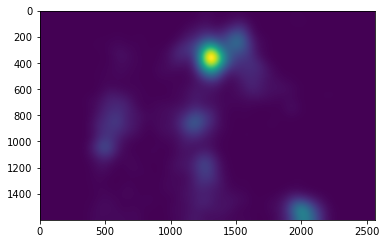

In [66]:
Smap=pysim.SaliencyMap(fixData,'Bellini_Halbakt',sizeX,sizeY,StimName='Painting',SD=50,Vis=1)

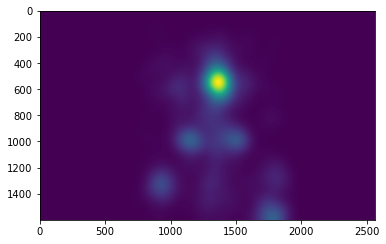

In [67]:
Smap=pysim.SaliencyMap(fixData,'Spiro_Halbakt',sizeX,sizeY,StimName='Painting',SD=50,Vis=1)